In [24]:
##Simulate
import tqdm
import msprime
import tsinfer

ts = msprime.simulate(
    sample_size=100,
    Ne=10**4,
    recombination_rate=5* 1e-8,
    mutation_rate=1e-8,
    length=20 * 10**3,
    random_seed=42,
)
ts.dump("./simulation/simulation-source.trees")
print("simulation done:", ts.num_trees, "trees and", ts.num_sites, "sites")

progress = tqdm.tqdm(total=ts.num_sites)
with tsinfer.SampleData(
    path="./simulation/simulation.samples", sequence_length=ts.sequence_length, num_flush_threads=2
) as sample_data:
    for var in ts.variants():
        sample_data.add_site(var.site.position, var.genotypes, var.alleles)
        progress.update()
    progress.close()

simulation done: 184 trees and 40 sites


100%|██████████| 40/40 [00:00<00:00, 221.61it/s]


In [25]:
with open("./simulation/simulate.vcf", "w") as vcf_file:
    ts.write_vcf(vcf_file, ploidy=2)

In [26]:
import tskit
source = tskit.load("./simulation/simulation-source.trees")
samples = tsinfer.SampleData.from_tree_sequence(
    source, path="./simulation/simulation.samples", num_flush_threads=2)

In [27]:
for v in samples.variants():
    print(v)

Variant(site=Site(id=0, position=518.9553456253984, ancestral_state='0', metadata={}, time=113.41150470328888, alleles=('0', '1')), genotypes=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8), alleles=('0', '1'))
Variant(site=Site(id=1, position=831.8782599687323, ancestral_state='0', metadata={}, time=153.27413741903655, alleles=('0', '1')), genotypes=array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [9]:
for h in samples.haplotypes():
    print(h)

(0, array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(1, array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int8))
(2, array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int8))
(3, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(4, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(5, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(6, array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))

In [10]:
inferred_ts = tsinfer.infer(samples)
inferred_ts.dump("./simulation/simulation_inferred.trees")


In [11]:
inferred_ts

In [12]:
ts

In [13]:
import tskit

source = tskit.load("./simulation/simulation-source.trees")
inferred = tskit.load("./simulation/simulation_inferred.trees")

subset = range(0, 10)
source_subset = source.simplify(subset)
inferred_subset = inferred.simplify(subset)

tree = source_subset.first()
print("True tree: interval=", tree.interval)
print(tree.draw(format="unicode"))

tree = inferred_subset.first()
print("Inferred tree: interval=", tree.interval)
print(tree.draw(format="unicode"))

True tree: interval= Interval(left=0.0, right=24.715391924771343)
         60      
       ┏━━┻━━━┓  
      38      ┃  
  ┏━━━━┻━━━━┓ ┃  
 33         ┃ ┃  
┏━┻━━┓      ┃ ┃  
┃   24      ┃ ┃  
┃ ┏━━┻━━┓   ┃ ┃  
┃ ┃    12   ┃ ┃  
┃ ┃   ┏━┻━┓ ┃ ┃  
┃ ┃  11   ┃ ┃ ┃  
┃ ┃  ┏┻━┓ ┃ ┃ ┃  
┃ ┃  9  ┃ ┃ ┃ ┃  
┃ ┃ ┏┻┓ ┃ ┃ ┃ ┃  
┃ ┃ ┃ ┃ ┃ ┃ ┃ ┃ 8
┃ ┃ ┃ ┃ ┃ ┃ ┃ ┃  
0 1 3 4 5 7 6 2  

Inferred tree: interval= Interval(left=0.0, right=1709.6542403976669)
       20        
 ┏━━┳━━━┻━┳━━━┓  
14  ┃     ┃   ┃  
┏┻┓ ┃     ┃   ┃  
┃ ┃ ┃    10   ┃ 9
┃ ┃ ┃  ┏━━╋━┓ ┃  
┃ ┃ ┃  8  ┃ ┃ ┃  
┃ ┃ ┃ ┏┻┓ ┃ ┃ ┃  
0 2 1 3 4 5 7 6  



In [14]:
print(source.at(0).draw(format="unicode"))

         60    
       ┏━━┻━━━┓
      38      ┃
  ┏━━━━┻━━━━┓ ┃
 33         ┃ ┃
┏━┻━━┓      ┃ ┃
┃   24      ┃ ┃
┃ ┏━━┻━━┓   ┃ ┃
┃ ┃    12   ┃ ┃
┃ ┃   ┏━┻━┓ ┃ ┃
┃ ┃  11   ┃ ┃ ┃
┃ ┃  ┏┻━┓ ┃ ┃ ┃
┃ ┃  9  ┃ ┃ ┃ ┃
┃ ┃ ┏┻┓ ┃ ┃ ┃ ┃
0 1 3 4 5 7 6 2



In [15]:
# RUn pipeLine Custom
inferred_ts = tsinfer.infer(samples)


In [10]:
ancestors = tsinfer.generate_ancestors(samples)

In [11]:
ancestors_ts = tsinfer.match_ancestors(samples, ancestors)

In [12]:
inferred_ts2 = tsinfer.match_samples(samples, ancestors_ts)

In [13]:
inferred_ts

In [14]:
ts

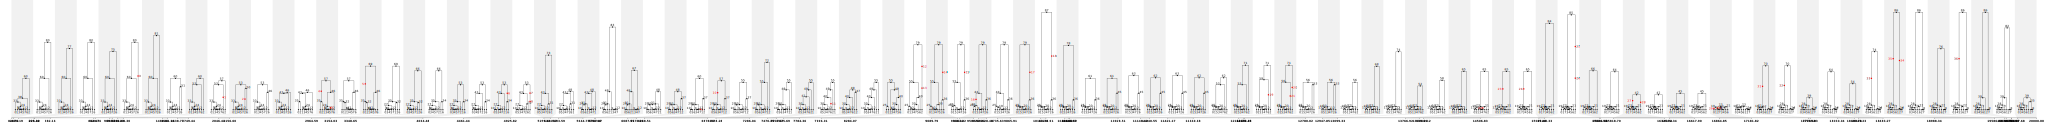

In [15]:
from IPython.display import SVG

svg = ts.draw_svg('./simulation/inferred_ts.svg', size= [10000, 600])
display(SVG(svg))

In [16]:
ancestors_ts

In [17]:
print(ancestors_ts.at(0).draw(format="unicode"))

      0              
      ┃              
      1              
┏━┳━━━╋━━━━━━┓       
2 ┃   ┃      ┃       
┃ ┃   ┃      ┃       
3 4   ┃      ┃       
  ┃   ┃      ┃       
  5   ┃      ┃       
      ┃      ┃       
      6      ┃       
    ┏━┻━┓    ┃       
    7   ┃    ┃ 8     
        ┃    ┃       
        ┃    ┃   9   
        ┃    ┃       
        ┃   10       
        ┃    ┃       
        ┃   11       
        ┃            
       15            
       ┏┻━┓          
       ┃  ┃        12
       ┃  ┃          
      13 14          



In [18]:
print(ancestors_ts.at(1).draw(format="unicode"))

      0              
      ┃              
      1              
┏━┳━━━╋━━━━━━┓       
2 ┃   ┃      ┃       
┃ ┃   ┃      ┃       
3 4   ┃      ┃       
  ┃   ┃      ┃       
  5   ┃      ┃       
      ┃      ┃       
      6      ┃       
    ┏━┻━┓    ┃       
    7   ┃    ┃ 8     
        ┃    ┃       
        ┃    ┃   9   
        ┃    ┃       
        ┃   10       
        ┃    ┃       
        ┃   11       
        ┃            
       15            
       ┏┻━┓          
       ┃  ┃        12
       ┃  ┃          
      13 14          



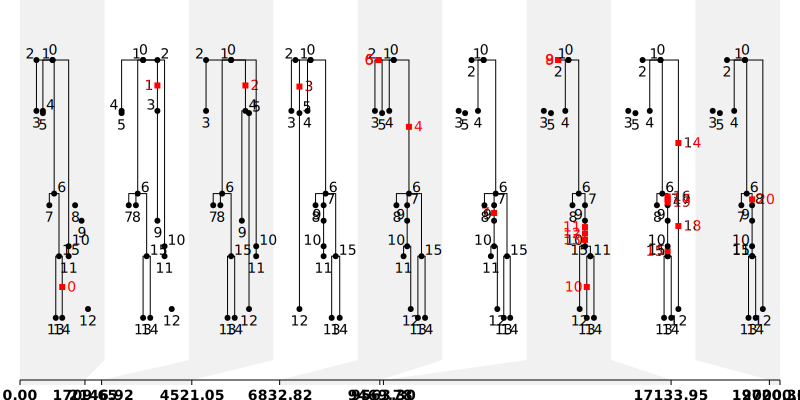

In [19]:
from IPython.display import SVG

svg = ancestors_ts.draw_svg('./simulation/ancestors_ts.svg', size= [800, 400])
display(SVG(svg))


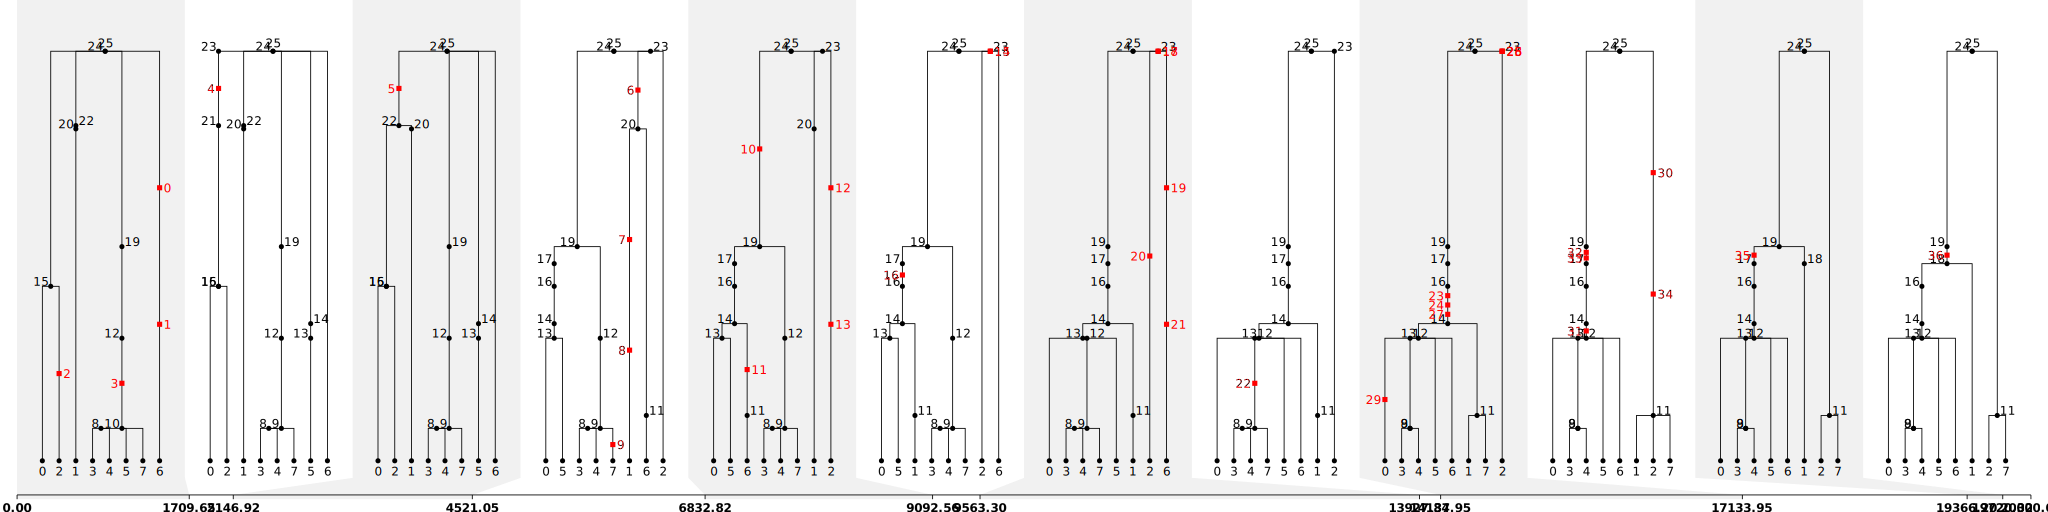

In [20]:
from IPython.display import SVG

svg = inferred_ts.draw_svg('./simulation/inferred_ts.svg', size= [2400, 600])
display(SVG(svg))



In [21]:
samples

In [22]:
for h in samples.haplotypes():
    print(h)


(0, array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(1, array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int8))
(2, array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int8))
(3, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(4, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(5, array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))
(6, array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int8))

In [23]:
for a  in ancestors.ancestors():
    print(a)


Ancestor(id=0, start=0, end=21, time=12316.00018867343, focal_sites=array([], dtype=int32), haplotype=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8))
Ancestor(id=1, start=0, end=21, time=12315.00018867343, focal_sites=array([], dtype=int32), haplotype=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8))
Ancestor(id=2, start=0, end=21, time=12314.00018867343, focal_sites=array([5, 6, 8, 9], dtype=int32), haplotype=array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8))
Ancestor(id=3, start=0, end=7, time=10078.259643706306, focal_sites=array([1], dtype=int32), haplotype=array([0, 1, 0, 0, 0, 1, 1], dtype=int8))
Ancestor(id=4, start=0, end=21, time=10078.259643706306, focal_sites=array([2], dtype=int32), haplotype=array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8))
Ancestor(id=5, start=0, end=7, time=9979.800272382108, focal_sites=array([3

## new_ancestors.add_ancestor(0, 5, 600, [], [0,1,1,0,1])


In [102]:
new_ancestors = tsinfer.AncestorData(samples)

In [103]:
for a in ancestors.ancestors():
#     print(a)
    new_ancestors.add_ancestor(a.start, a.end, a.time, a.focal_sites, a.haplotype)
new_ancestors.record_provenance("generate-ancestors")
#     print(a)

In [104]:
new_ancestors.finalise()

In [105]:
ancestors.ancestors_length

array([18348.06380758, 18348.06380758, 18348.06380758,  7817.8395724 ,
       18348.06380758,  7817.8395724 , 18348.06380758, 18348.06380758,
       18290.3457596 , 18290.3457596 , 18348.06380758, 18348.06380758,
       17853.07637485, 18348.06380758, 18348.06380758])

In [106]:
new_ancestors.ancestors_length

array([11243.85142446, 11243.85142446, 11243.85142446,  4573.01615578,
       11243.85142446,  4573.01615578, 11243.85142446, 11243.85142446,
       10586.46474275, 10586.46474275, 11243.85142446, 11243.85142446,
       10551.56555385, 11243.85142446, 11243.85142446])

In [92]:
new_ancestors_ts = tsinfer.match_ancestors(samples, new_ancestors)

In [93]:
ancestors_ts

In [75]:
new_ancestors_ts

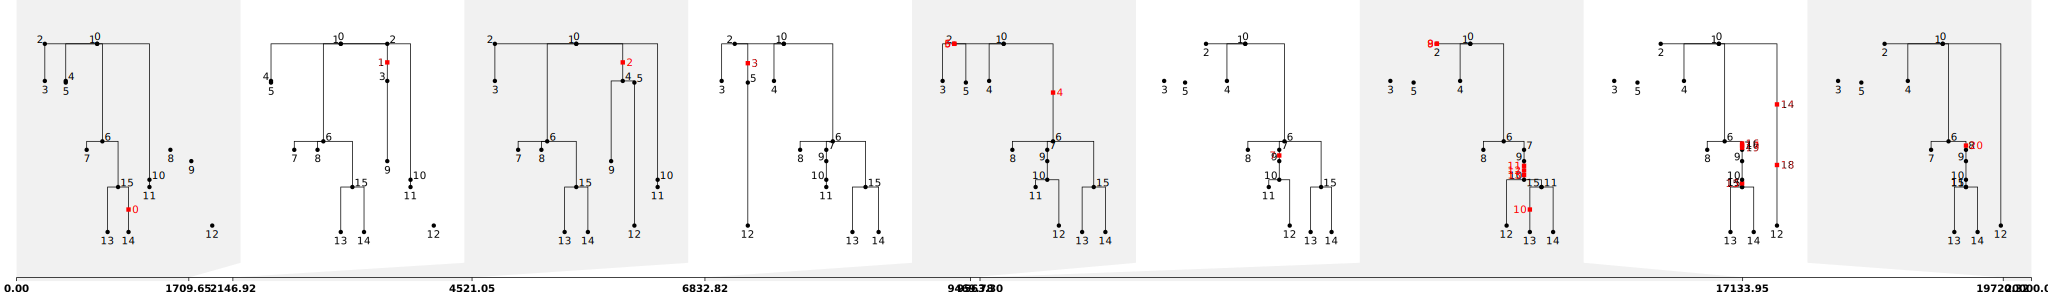

In [67]:
from IPython.display import SVG

svg = ancestors_ts.draw_svg('./simulation/ancestors_ts.svg', size= [2800, 400])
display(SVG(svg))


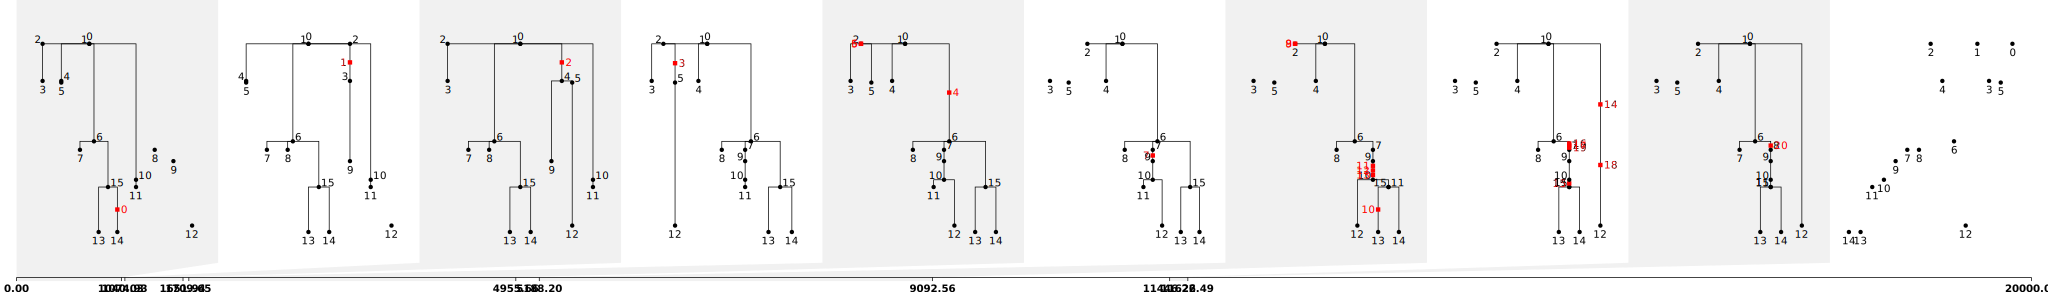

In [65]:
from IPython.display import SVG

svg = new_ancestors_ts.draw_svg('./simulation/ancestors_ts.svg', size= [2800, 400])
display(SVG(svg))


In [48]:
new_inferred_ts2 = tsinfer.match_samples(samples, new_ancestors_ts)

In [49]:
new_inferred_ts2

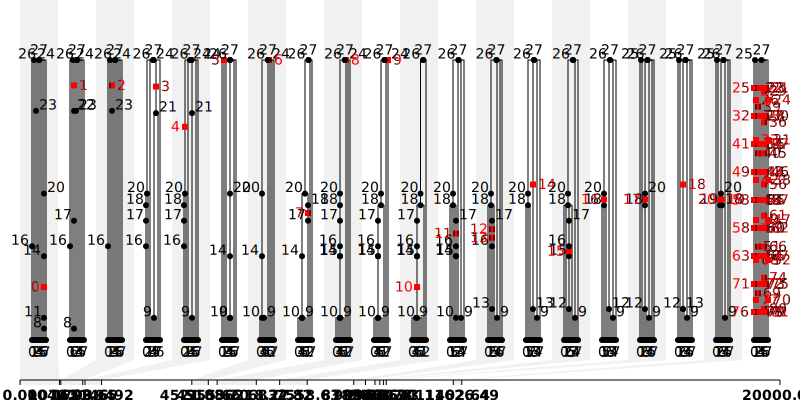

In [50]:
from IPython.display import SVG

svg = new_inferred_ts2.draw_svg('./simulation/ancestors_ts.svg', size= [800, 400])
display(SVG(svg))


In [25]:
ts

In [116]:
##SAMPLE
import tsinfer

with tsinfer.SampleData(sequence_length=5) as sample_data:
    sample_data.add_site(0, [1, 1, 0, 0], ["A", "T"])
    sample_data.add_site(1, [1, 0, 0, 0], ["G", "C"])
    sample_data.add_site(2, [0, 0, 1, 1], ["G", "C"])
    sample_data.add_site(3, [0, 0, 1, 0], ["G", "C"]) 
    sample_data.add_site(4, [1, 0, 1, 0], ["G", "C"]) 
    
    
    

In [117]:
inferred_ts = tsinfer.infer(sample_data)


In [118]:
for tree in inferred_ts.trees():
    print(tree.draw(format="unicode"))
for sample_id, h in enumerate(inferred_ts.haplotypes()):
    print(sample_id, h, sep="\t")

   8   
   ┃   
   7   
 ┏━┻━┓ 
 6   4 
┏┻┓ ┏┻┓
0 1 2 3

  8    
  ┃    
  7    
┏━╋━━┓ 
5 6  4 
┃ ┃ ┏┻┓
0 1 2 3

    8  
    ┃  
    7  
 ┏━━╋━┓
 5  6 4
┏┻┓ ┃ ┃
0 2 1 3

0	TCGGC
1	TGGGG
2	AGCCC
3	AGCGG


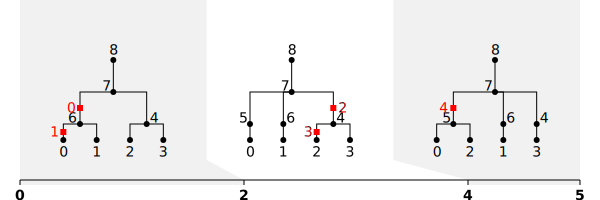

In [123]:
svg2 = inferred_ts.draw_svg('./simulation/simplify3.svg')
display(SVG(svg2))

In [124]:
inferred_ts